In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap

In [2]:
df = pd.read_csv('kc_house_data_clean.csv')
df.head()

Unnamed: 0          id        date     price  bedrooms  bathrooms  \
0           0  7129300520  10/13/2014  221900.0         3       1.00   
1           1  6414100192   12/9/2014  538000.0         3       2.25   
2           2  5631500400   2/25/2015  180000.0         2       1.00   
3           3  2487200875   12/9/2014  604000.0         4       3.00   
4           4  1954400510   2/18/2015  510000.0         3       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...     long  sqft_living15  \
0         1180      5650     1.0         0.0  ... -122.257           1340   
1         2570      7242     2.0         0.0  ... -122.319           1690   
2          770     10000     1.0         0.0  ... -122.233           2720   
3         1960      5000     1.0         0.0  ... -122.393           1360   
4         1680      8080     1.0         0.0  ... -122.045           1800   

   sqft_lot15  year  month  day  month_year   price_bands  price_list_level  \
0        5650  2014     10   13     13-2014  200K to 300K                 3   
1        7639  2014     12    9      9-2014  500K to 600K                 6   
2        8062  2015      2   25     25-2015  100K to 200K                 2   
3        5000  2014     12    9      9-2014  600K to 700K                 7   
4        7503  2015      2   18     18-2015  500K to 600K                 6   

   yr_built_bands  
0            1950  
1            1950  
2            1930  
3            1960  
4            1980  

[5 rows x 29 columns]

In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year',
       'month', 'day', 'month_year', 'price_bands', 'price_list_level',
       'yr_built_bands'],
      dtype='object')

## Price by locations - Heat Map

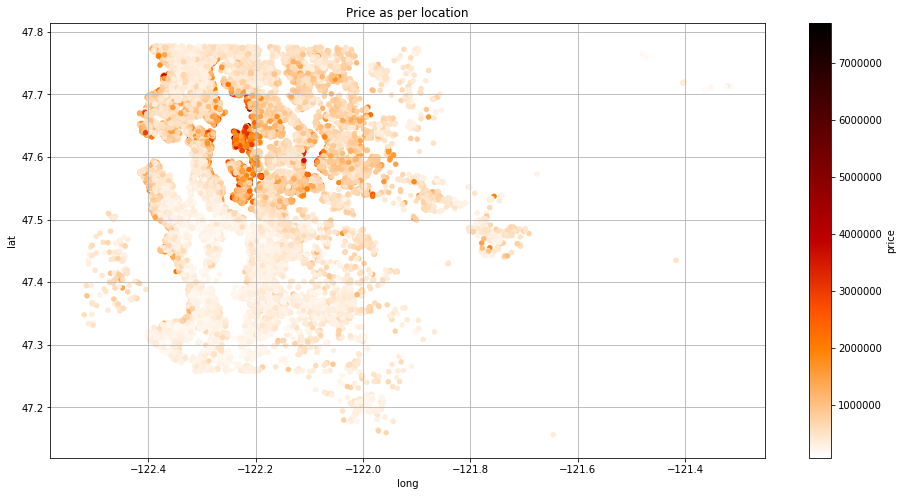

In [4]:
df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="price",
             cmap="gist_heat_r", colorbar=True, sharex=False)
plt.grid(which='both')
plt.title('Price as per location')
plt.show()

## Age by Location - HeatMap

In [4]:
now = 2016

In [5]:
df['age'] = now - df['yr_built']

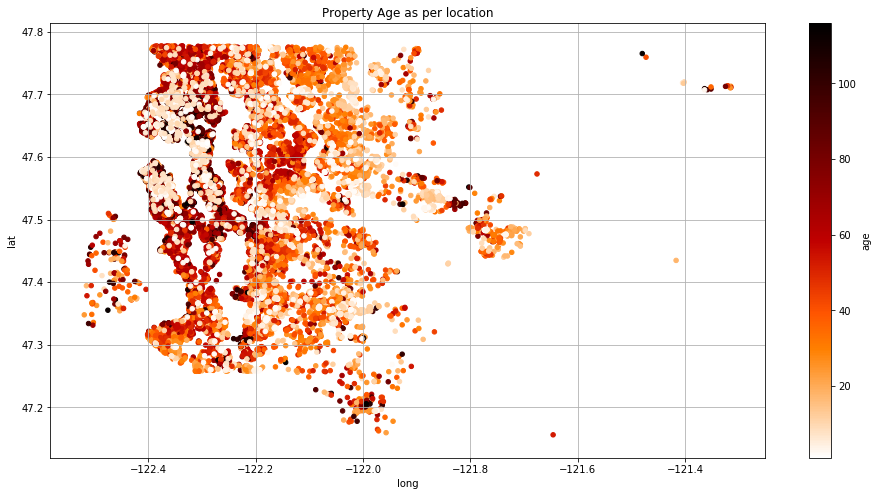

In [6]:
df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="age",
             cmap="gist_heat_r", colorbar=True, sharex=False)
plt.grid(which='both')
plt.title('Property Age as per location')
plt.show()

## Grade by Location - HeatMap

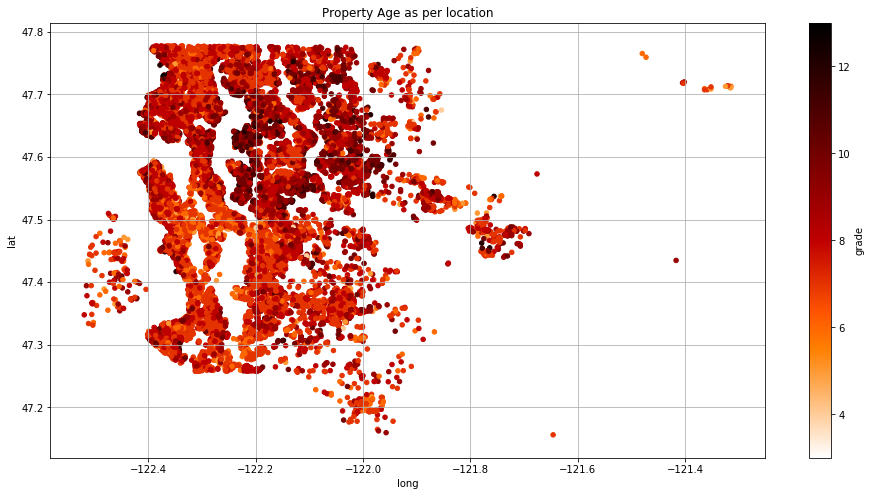

In [7]:
df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="grade",
             cmap="gist_heat_r", colorbar=True, sharex=False)
plt.grid(which='both')
plt.title('Property Age as per location')
plt.show()

### Search low grade buildings

In [10]:
df_low_grade = df.loc[df['grade'] < 7]
df_low_grade.shape

(2308, 30)

In [11]:
df_low_grade.describe()

Unnamed: 0            id         price     bedrooms    bathrooms  \
count   2308.000000  2.308000e+03  2.308000e+03  2308.000000  2308.000000   
mean    9955.018198  4.382339e+09  2.952491e+05     2.641248     1.225737   
std     5703.047706  2.800186e+09  1.235379e+05     0.861183     0.418740   
min        2.000000  2.800031e+06  7.800000e+04     1.000000     0.500000   
25%     5004.250000  1.958225e+09  2.100000e+05     2.000000     1.000000   
50%     9808.500000  3.738900e+09  2.700000e+05     3.000000     1.000000   
75%    14870.500000  7.227502e+09  3.580000e+05     3.000000     1.500000   
max    21586.000000  9.900000e+09  1.200000e+06     7.000000     3.750000   

       sqft_living      sqft_lot       floors   waterfront         view  ...  \
count  2308.000000  2.308000e+03  2308.000000  2308.000000  2308.000000  ...   
mean   1163.460572  1.387430e+04     1.105503     0.006066     0.097920  ...   
std     400.136726  5.103426e+04     0.238802     0.077664     0.503077  ...   
min     370.000000  8.350000e+02     1.000000     0.000000     0.000000  ...   
25%     870.000000  5.176500e+03     1.000000     0.000000     0.000000  ...   
50%    1089.000000  7.200000e+03     1.000000     0.000000     0.000000  ...   
75%    1370.000000  9.480000e+03     1.000000     0.000000     0.000000  ...   
max    3900.000000  1.651359e+06     2.500000     1.000000     4.000000  ...   

               lat         long  sqft_living15     sqft_lot15         year  \
count  2308.000000  2308.000000    2308.000000    2308.000000  2308.000000   
mean     47.529017  -122.254608    1389.455806   11578.299827  2014.352253   
std       0.132018     0.141920     367.430355   26292.140815     0.477776   
min      47.194600  -122.512000     620.000000    1198.000000  2014.000000   
25%      47.470475  -122.350000    1140.000000    5200.000000  2014.000000   
50%      47.520400  -122.298000    1320.000000    7201.500000  2014.000000   
75%      47.634775  -122.204000    1562.500000    9000.000000  2015.000000   
max      47.777500  -121.315000    3130.000000  425581.000000  2015.000000   

             month          day  price_list_level  yr_built_bands          age  
count  2308.000000  2308.000000       2308.000000     2308.000000  2308.000000  
mean      6.467504    16.040728          3.470104     1937.235702    74.347054  
std       3.155318     8.628994          1.254197       20.840216    20.832407  
min       1.000000     1.000000          1.000000     1900.000000     1.000000  
25%       4.000000     8.000000          3.000000     1920.000000    63.000000  
50%       6.000000    16.000000          3.000000     1940.000000    73.000000  
75%       9.000000    24.000000          4.000000     1950.000000    91.000000  
max      12.000000    31.000000         10.000000     2010.000000   116.000000  

[8 rows x 27 columns]

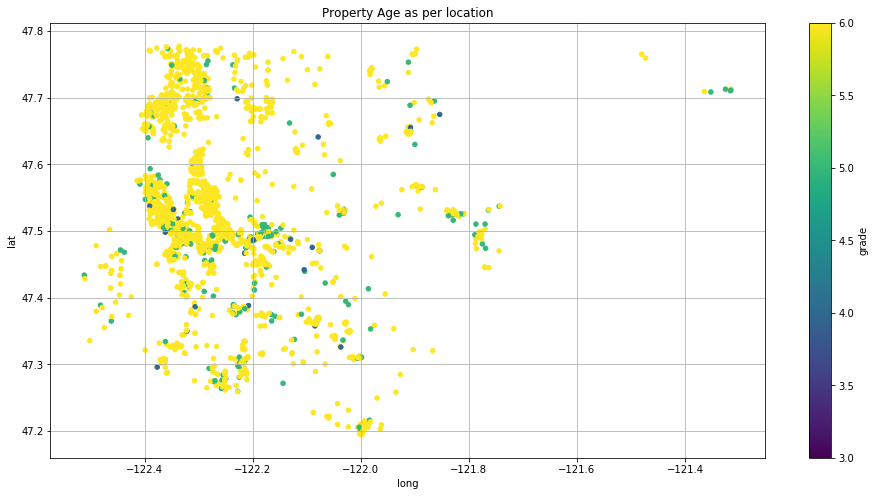

In [12]:
df_low_grade.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="grade",
             cmap="viridis", colorbar=True, sharex=False)
plt.grid(which='both')
plt.title('Property Age as per location')
plt.show()

# Criteria 1 - Low Grade & Above Median Ren Age

In [15]:
df_low_grade_above_avg_age = df.loc[(df['grade'] < 7) & (df['age'] > 53)]
df_low_grade_above_avg_age.shape

(2007, 30)

In [16]:
df_low_grade_above_avg_age['price'].describe()

count    2.007000e+03
mean     3.011241e+05
std      1.256232e+05
min      7.800000e+04
25%      2.140000e+05
50%      2.765000e+05
75%      3.680000e+05
max      1.200000e+06
Name: price, dtype: float64

Histogram

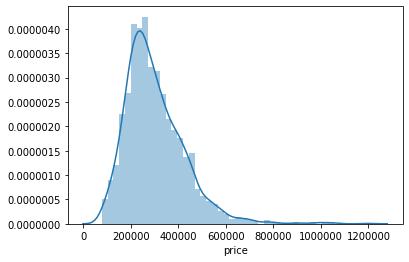

In [17]:
sns.distplot(df_low_grade_above_avg_age['price'])

Heat Map - Price

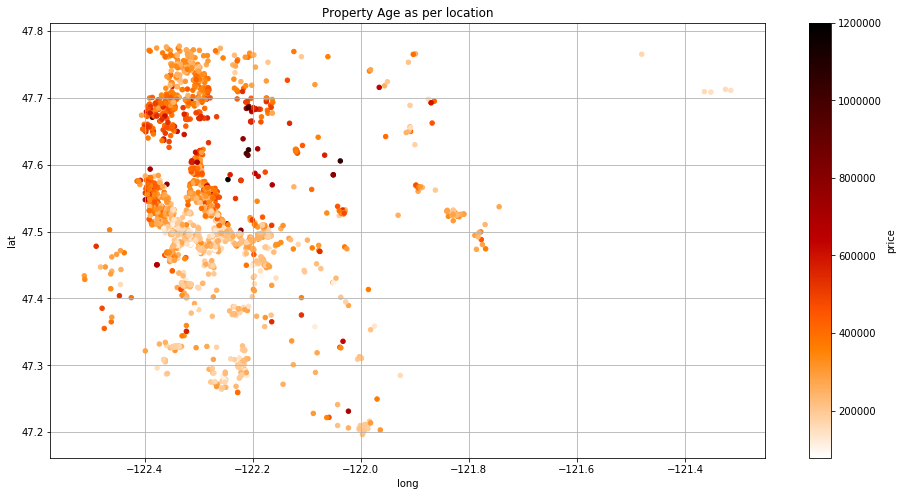

In [18]:
df_low_grade_above_avg_age.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="price",
             cmap="gist_heat_r", colorbar=True, sharex=False)
plt.grid(which='both')
plt.title('Property Age as per location')
plt.show()

# Criteria 2 - Bad Condition & Above Median Ren Age

In [19]:
df_bad_con_above_avg_age = df.loc[(df['condition'] < 3) & (df['age'] > 53)]
df_bad_con_above_avg_age.shape

(148, 30)

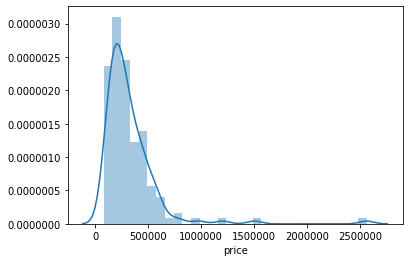

In [20]:
sns.distplot(df_bad_con_above_avg_age['price'])

In [21]:
df_bad_con_above_avg_age['price'].describe()

count    1.480000e+02
mean     3.230246e+05
std      2.723662e+05
min      7.800000e+04
25%      1.750000e+05
50%      2.575000e+05
75%      4.000000e+05
max      2.560000e+06
Name: price, dtype: float64

Heat Map - Price

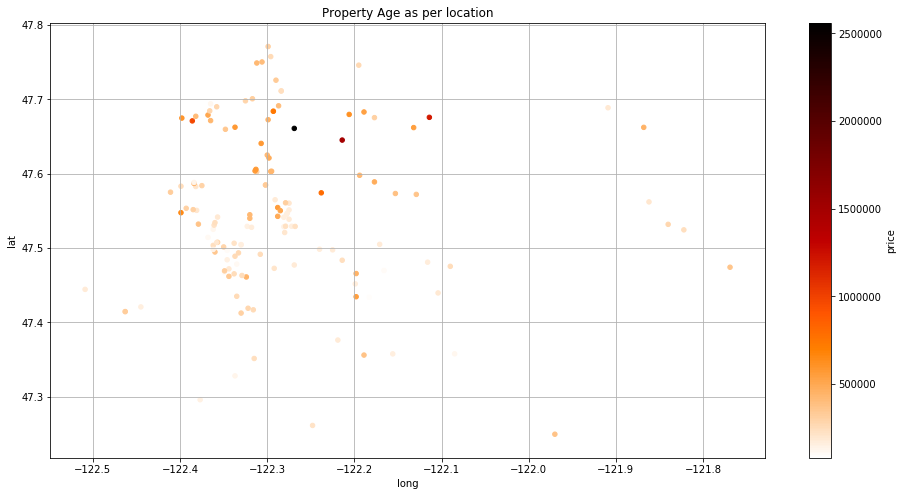

In [22]:
df_bad_con_above_avg_age.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="price",
             cmap="gist_heat_r", colorbar=True, sharex=False)
plt.grid(which='both')
plt.title('Property Age as per location')
plt.show()

# Criteria 3 - Bad Condition & Low Grade

In [24]:
df_bad_con_low_grade = df.loc[(df['condition'] < 3) & (df['grade'] < 7)]
df_bad_con_low_grade.shape

(99, 30)

In [25]:
df_bad_con_low_grade['price'].describe()

count        99.000000
mean     259409.090909
std      149877.218389
min       78000.000000
25%      160000.000000
50%      220500.000000
75%      320000.000000
max      975000.000000
Name: price, dtype: float64

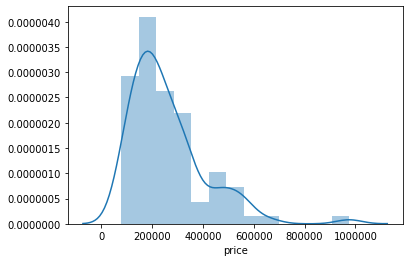

In [26]:
sns.distplot(df_bad_con_low_grade['price'])

Heat Map Price

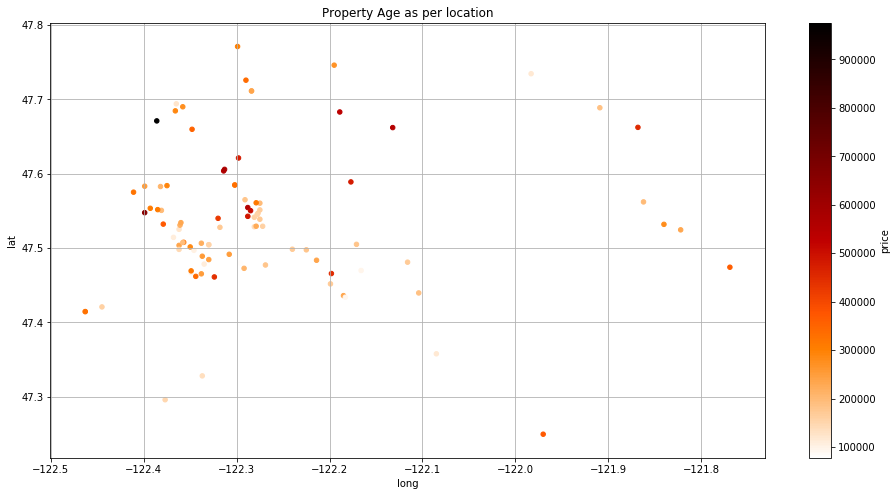

In [27]:
df_bad_con_low_grade.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="price",
             cmap="gist_heat_r", colorbar=True, sharex=False)
plt.grid(which='both')
plt.title('Property Age as per location')
plt.show()

# Locations Arrays - For Folium

#### Orignial DataFrame

In [28]:
list_long = np.array(df['long'])
list_long[:5]

array([-122.257, -122.319, -122.233, -122.393, -122.045])

In [29]:
list_lat = np.array(df['lat'])
list_lat[:5]

array([47.5112, 47.721 , 47.7379, 47.5208, 47.6168])

#### Below Average Grade & Above Median Age for Renovation 

In [30]:
list_long_for_ren = np.array(df_low_grade_above_avg_age['long'])
list_long_for_ren[:5]

array([-122.233, -122.218, -122.132, -122.175, -122.31 ])

In [31]:
list_lat_for_ren = np.array(df_low_grade_above_avg_age['lat'])
list_lat_for_ren[:5]

array([47.7379, 47.3048, 47.6621, 47.4485, 47.7264])

#### Below Average Condition & Above Median Age for Renovation 

In [32]:
list_long_bad_con = np.array(df_bad_con_above_avg_age['long'])
list_long_bad_con[:5]

array([-122.132, -122.299, -122.344, -122.195, -122.129])

In [33]:
list_lat_bad_con = np.array(df_bad_con_above_avg_age['lat'])
list_lat_bad_con[:5]

array([47.6621, 47.6727, 47.472 , 47.7461, 47.5722])

#### Below Average Condition & Low Grade 

In [34]:
list_lat_bad_con_low_grade = np.array(df_bad_con_low_grade['lat'])
list_lat_bad_con_low_grade[:5]

array([47.6621, 47.7461, 47.6499, 47.589 , 47.5507])

In [35]:
list_long_bad_con_low_grade = np.array(df_bad_con_low_grade['long'])
list_long_bad_con_low_grade[:5]

array([-122.132, -122.195, -121.909, -122.177, -122.381])

### Age > 40yr & < 60yr:

This is for all properties that are over threshold.

In [88]:
df_old = df.loc[(df['age'] > 40) & (df['age'] < 60)]
df_old.shape

(4298, 30)

In [89]:
list_lat_old = np.array(df_old['lat'])
list_lat_old[:5]

array([47.5208, 47.4095, 47.5123, 47.6007, 47.3343])

In [90]:
list_long_old = np.array(df_old['long'])
list_long_old[:5]

array([-122.393, -122.315, -122.337, -122.145, -122.306])

## Basic Map

Just using the the first location as a starting point

In [39]:
map_basic = folium.Map(location=[47.5112, -122.257], zoom_start=10)

In [40]:
map_basic

## Markers Functions:

In [47]:
def to_marker_blue(loc):
    return folium.CircleMarker(location=loc, radius = 1, color="blue")

In [48]:
def to_marker_yellow(loc):
    return folium.CircleMarker(location=loc, radius = 1, color="yellow")

In [49]:
def to_marker_red(loc):
    return folium.CircleMarker(location=loc, radius = 1, color="red")

In [50]:
def to_marker_purple(loc):
    return folium.CircleMarker(location=loc, radius = 1, color="purple")

In [51]:
def to_marker_orange(loc):
    return folium.CircleMarker(location=loc, radius = 1, color="orange")

In [52]:
def to_marker_green(loc):
    return folium.CircleMarker(location=loc, radius = 1, color="green")

### Markers - Low Grade & Age
Locations For Below avg grade & above avg age

In [53]:
locations_for_ren = list(zip(list_lat_for_ren, list_long_for_ren))

In [54]:
locations_for_ren[:5]

[(47.7379, -122.233),
 (47.3048, -122.218),
 (47.6621, -122.132),
 (47.4485, -122.175),
 (47.7264, -122.31)]

In [55]:
markers_for_ren = list(map(to_marker_blue, locations_for_ren))
markers_for_ren[:5]

### Marker - Bad Condition & Age
Locations For Below avg condition & above avg age

In [56]:
locations_bad_con = list(zip(list_lat_bad_con, list_long_bad_con))

In [57]:
locations_bad_con[:5]

[(47.6621, -122.132),
 (47.6727, -122.299),
 (47.472, -122.344),
 (47.7461, -122.195),
 (47.5722, -122.129)]

In [58]:
markers_bad_con = list(map(to_marker_purple, locations_bad_con))
markers_bad_con[:5]

### Markers - Long Bad Conditon & Low_grade

In [59]:
locations_lbclg = list(zip(list_lat_bad_con_low_grade, list_long_bad_con_low_grade))

In [60]:
locations_lbclg[:5]

[(47.6621, -122.132),
 (47.7461, -122.195),
 (47.6499, -121.909),
 (47.589, -122.177),
 (47.5507, -122.381)]

In [61]:
markers_lbclg = list(map(to_marker_red, locations_lbclg))
markers_lbclg[:5]

### Markers - Old houses +40

In [91]:
locations_old = list(zip(list_lat_old, list_long_old))

In [92]:
markers_old = list(map(to_marker_green, locations_old))

# Adding Marker to Map

In [64]:
print(len(markers_for_ren))
print(len(markers_bad_con))

2007
148


Had to use a loop function as using "map" in iterate it was casuing problems. 

There is also an issue that over a sertaion number of markers, Folium cannot dispaly the map anymore. Therfore I had to keep the maps seperate.

In [65]:
def markers_to_map_while_loop(markers, map_obj):
    i = 0
    while i < len(markers):
        markers[i].add_to(map_obj)
        i += 1
    return map_obj

### Low Grade

In [66]:
low_grade_map = folium.Map(location=[47.5112, -122.257], zoom_start=10)

In [67]:
markers_to_map_while_loop(markers_for_ren, low_grade_map)

### Bad Condition

In [68]:
bad_con_map = folium.Map(location=[47.5112, -122.257], zoom_start=10)

In [69]:
markers_to_map_while_loop(markers_bad_con, bad_con_map)

## long_bad_con_low_grade

In [70]:
bad_con_low_grade_map = folium.Map(location=[47.5112, -122.257], zoom_start=10)

In [71]:
len(markers_lbclg)

99

In [72]:
markers_to_map_while_loop(markers_lbclg, bad_con_low_grade_map)

## Old Houses

In [93]:
old_map = folium.Map(location=[47.5112, -122.257], zoom_start=10)

In [94]:
markers_to_map_while_loop(markers_old, old_map)

# Other Method Not used

Add the markers to the map

In [57]:
# def markers_to_map(markers, map_obj):
#     for marker in markers:
#         marker.add_to(map_obj)
#     return map_obj

In [58]:
# marker_maps = list(zip(markers, [map_basic]*len(markers)))
# map(markers_to_map, list(zip(markers, [map_basic]*len(markers))))
# markers[2].add_to(map_basic)

In [59]:
# markers_to_map(markers, map_basic)

NameError: name 'markers' is not defined

# Zipcode Maps

In [ ]:
# df_zipcodes = pd.read_csv('Zipcodes_for_King_County_and_Surrounding_Area__zipcode_area.csv')

In [ ]:
# Set zipcode type to string (folium)
df_zipcodes['ZIPCODE'] = df_zipcodes['ZIPCODE'].astype('str')
# get the mean value across all data points
zipcode_data = df_zipcodes.groupby('ZIPCODE').aggregate(np.mean)
zipcode_data.reset_index(inplace = True)